<a href="https://colab.research.google.com/github/Manoj-S375/PRODIGY_ML_01/blob/main/House_Pricing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre-Processing of Dataset**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
df = pd.read_csv("/content/drive/MyDrive/ML Dataset Intern/House_data.csv")

print(df.corr())
print(df.describe())

                 Id      Area  Bedrooms     Price  Bathrooms
Id         1.000000 -0.040746  0.003074 -0.011630  -0.014566
Area      -0.040746  1.000000  0.132801  0.296497   0.121660
Bedrooms   0.003074  0.132801  1.000000  0.229611   0.402390
Price     -0.011630  0.296497  0.229611  1.000000   0.462697
Bathrooms -0.014566  0.121660  0.402390  0.462697   1.000000
                Id           Area     Bedrooms          Price    Bathrooms
count  2919.000000    2919.000000  2919.000000    2919.000000  2919.000000
mean   1460.000000   10168.114080     2.860226  180052.854648     1.758136
std     842.787043    7886.996359     0.822693   57381.565721     0.642680
min       1.000000    1300.000000     0.000000   34900.000000     0.000000
25%     730.500000    7478.000000     2.000000  154795.084150     1.000000
50%    1460.000000    9453.000000     3.000000  176734.841500     2.000000
75%    2189.500000   11570.000000     3.000000  191895.744150     2.500000
max    2919.000000  215245.000000 

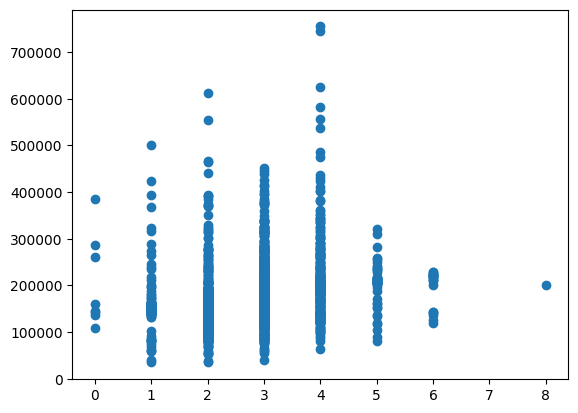

In [26]:
plt.scatter(df["Bedrooms"],df["Price"])

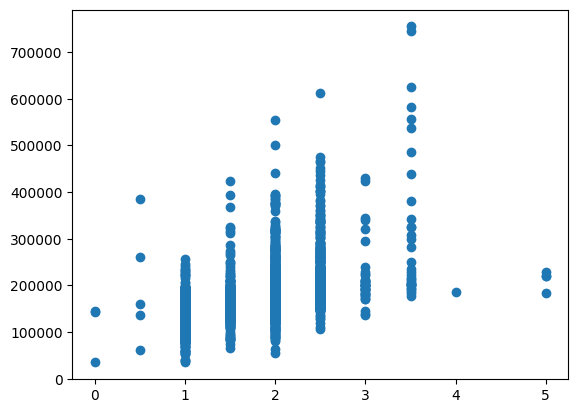

In [27]:
plt.scatter(df["Bathrooms"],df["Price"])

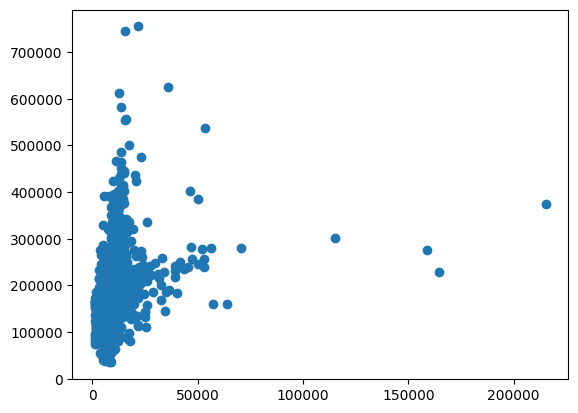

In [28]:
plt.scatter(df["Area"],df["Price"])

In [29]:
def getfeature(dataobj):
  return [dataobj.min(),dataobj.max()]
bath_range = getfeature(df["Bathrooms"])
bed_range = getfeature(df["Bedrooms"])
area_range = getfeature(df["Area"])

In [30]:
def normalize(dataobj,lower,upper):
  data_normalized = (dataobj - dataobj.min()) / (dataobj.max() - dataobj.min()) * (upper - lower) + lower
  return data_normalized
def normalize_input(x,l1,u1,l2,u2):
  val = (x-l1)/(u1-l1)*(u2-l2)+l2
  return val
df["Price"] = normalize(df["Price"],1,10)
df["Area"] = normalize(df["Area"],1,10)

In [31]:
df.drop(df[df["Bedrooms"] > 6].index,inplace = True)
df.drop(df[df["Bathrooms"] > 3].index,inplace = True)
df.drop(df[df["Area"] > 5].index,inplace = True)

In [32]:
x = df[["Bedrooms","Bathrooms","Area"]]
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(2300, 3) (576, 3)


# **Training the Model**

In [33]:
class MLR_model:
  def __init__(self,learn,epoch):
    self.learn_rate = learn
    self.epochs = epoch
    self.tolerance = 1e-6
    self.intercept = 0
    self.weights = None

  def fit(self,x,y):
    x = np.column_stack((np.ones(len(x)),x))
    self.weights = np.random.randn(x.shape[1])

    perror = np.inf
    for _ in range(self.epochs):
      pred = np.dot(x,self.weights)
      error = y - pred

      self.weights += self.learn_rate * np.dot(x.T, error)/ len(x)
      self.intercept += self.learn_rate * np.mean(error)

      cerror = np.mean(error**2)
      if abs(cerror - perror) > self.tolerance:
        perror = cerror

  def predict(self,x):
      x = np.column_stack((np.ones(len(x)),x))
      return np.dot(x,self.weights)

In [36]:
model = MLR_model(0.1,5000)
X_train = np.array(X_train)
y_train = np.array(y_train)
model.fit(X_train, y_train)


# **Testing the model**

In [37]:
y_pred = model.predict(X_test[:5])
print("Actual values:",y_test[:5],"\n")
print("Predictions:", y_pred)
print("Final weights:", model.weights)
print("Intercept:", model.intercept)
print("Mean Squared Error:",mean_squared_error(y_pred,y_test[:5]))

Actual values: 621     3.563394
1909    2.458292
1379    2.657270
2650    2.671822
1064    2.488543
Name: Price, dtype: float64 

Predictions: [3.1659845  2.39438415 3.10981057 2.85982257 2.72592205]
Final weights: [0.9170948  0.02093873 0.42574066 0.78647848]
Intercept: -0.49925424352269776
Mean Squared Error: 0.09170089408987186


In [35]:
val = {"Bedrooms":10,"Bathrooms":5,"Area":12.417}
new_value = pd.DataFrame([val])
print(model.predict(new_value))

[13.02148279]
